# I'm Something of a Painter Myself

By: Henrique Magalhaes Rio, Kilbourne Charrier, Jonathan Olavarria, and Ethan Creagar

In [2]:
from IPython.display import Image

Rubric:

    20 points: Following the rules. Your project write-up and code must be uploaded to Canvas by March 2 at 3:00 p.m.

    50 points: Overall quality of the project. Further breakdown of the 50 points:

        –  (8 points) Introduction: The write-up must have a clearly written introduction which summarizes the problem and your solution. The introduction should also contain an outline (written out in full sentences) of the contents of the remainder of the write-up.

        –  (8 points) Problem Description: The problem to be solved should be clearly described and motivated.

        –  (10 points) Quality of Solution: The methods employed in your solution should be appropriate for the problem at hand and explained well.

        –  (10 points) Cohesiveness: The write-up should read like a single, coherent docu- ment not a collection of disparate parts. The formatting should also be consistent.

        –  (9 points) Sources and Bibliography: All material coming from a third party should be properly cited in the text. (Note that this does not mean that plagiarism is only docked 9 points. These points concern the quality of good faith citations.)

        –  (5 points) Grammar, Spelling, and Mechanics: The writing should be free or almost free of errors.



### Introduction



Upon first impression, it may not be obvious that aritsts and machine learning algorithms have anything in common. While artists use their human creativity to develop something original, algorithms are only able to use the information that they've been given to predict what may happen if another similar piece of information is provided to them. However, upon further inspection, both rely heavily on a common ally: patterns. While artists like Claude Monet rely on similar brush strokes and models to create their distinctive style, machine learning algorithms rely on patterns in data to stay consistant in order to predict what might come next given never-before-seen observations. It might then be natural to wonder whether a machine learning algorithm could be trained on the patterns that an artist like Monet used in his art to create new "paintings" that imitate the same style. This is the problem presented in the Kaggle Competition, "I'm Something of a Painter Myself". Through the use of PyTorch's neural network software, we created a Generative Adversarial Network that modifies real-life photos into pictures that imitated an Impressionist painting style like that of Monet.

Below, we will first describe the problem and the mechanics of GANs in greater detail. We will then detail our methods of creating these networks, including the software used, the issues faced, and the structure of our final model. Finally, we will provide examples of the "paintings" that our model created and discuss the accuracy of our imitations as well as how they might be improved upon.

In this competition, participants are provided with Monet paintings as well as real photos with scenery similar to that which Monet might have used as a model for his artwork, and attempt to turn these photos into the style of Monet using an algorithm called a Generative Adversarial Network (GAN). GANs use dualing generator and discriminator models to create videos, music, photos, and other types of media [source] that closely imitate something that might have been created by a human; in this case, Claude Monet. These networks are best known due to their utility in creating "deepfake" videos[source], but are also used to create and/or imitate various forms of artwork. Competitors are judged based on the Fréchet Inception Distance (FID) between their GAN created "paintings" and real Monet artworks. This FID between real images r and generated images g is computed as
$$FID=||\mu r−\mu g||2+Tr(\Sigma r+\Sigma g−2(\Sigma r \Sigma g)1/2)$$

where Tr is the sum of the diagonal elements [1]. FID, created in 2017, is commonly used to evaluate images created  by GAN networks by comparing the deeper features of the generated images with the true images rather than comparing pixel-by-pixel. Submissions with a small FID will be judged to have best imitated Monet paintings with their GAN model. 7,000 to 10,000 images must be generated and submitted, and these images must be in a $256 \text{x} 256 \text{x} 3$ format.

To successfully complete this competition, teams must first create a GAN model in their software of choice. A GAN model is build from two separate machine learning models, a generator and a discriminator. The generator model is responsible for the creation of images, while the discriminator model learns to tell the difference between a generated painting and a true Monet painting. These models work against each other; the generator attempts to fool the discriminator, while the discriminator helps the generator improve by giving feedback as to whether the generated paintings can be told apart from the real Monets. The GAN will run for a specified number of epochs, at which time the GAN will be judged to have been trained. If properly trained, the GAN should then have the ability to create artwork which has a resemblance to its intended target; in this case, the Monet artwork. GANs can be created with several different software packages, but we chose to use the Pytorch package in Python as it allows for easy GPU acceleration which saves compute power and time.

### Background

Generative Adversarial Networks (GANs) are, as the name suggests, generative models with the goal of recreating as accurately as possible the data on which it is trained. This is traditionally accomplished using two neural networks: a Generator and a Discriminator. The Generator is fed random input and attempts to produce an output which is then fed into the Discriminator. The Discriminator is tasked with determining whether the input it's given originates from the "real" dataset, that is, the dataset which the GAN is attempting to recreate, or if the input was created by the Generator. These models work against each other; the generator attempts to fool the discriminator, while the discriminator helps the generator improve by giving feedback as to whether the generated paintings can be told apart from the real Monets. The GAN will run for a specified number of epochs, at which time the GAN will be judged to have been trained. If properly trained, the GAN should then have the ability to create artwork which has a resemblance to its intended target; in this case, the Monet artwork.

Since the original paper's release in 2014 there have been several variations on the traditional model's structure. Two variations we are using in our solution are DCGAN and CycleGAN. The former uses convolutional neural networks in order to increase model performance while the latter uses two pairs of Generator/Discriminator pairs to essentially combine two GANs in one model. The two Generator/Discriminator pairs enable us to perform "Style Transfer" to convert the real-world images we are given into Monet-like pictures. GANs can be created with several different software packages, but we chose to use the Pytorch package for DCGAN and Tensorflow for CycleGAN, both prominent machine learning packages available for Python with .

### Solution

We started on the project based of a blog post by Salian which shows how to generate new art based of  Art from several famous painters. For our project we had photos of landscapes and Monets, and we had to generate Monets based of these photos. The first time we ran the notebook from Salian it worked, however, it seemed to generate new landscape photos instead of making them more Monet paintings this seemed to be due to the fact that the data was really unbalanced as we had 7000 photos and only 300 Monets. This cause some of the batches to have no Monet paintings, and therefore it seemed to make training harder. We tried increasing the batch size but it didn't seemed to help and it made training more computationally intensive. The solution found was to cut down on the number of landscape phots to around 800 for training.


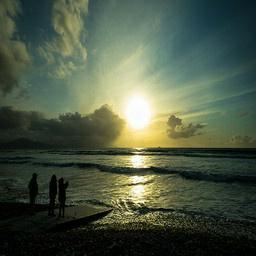

In [3]:
Image(r'C:\Users\henri\dsci478k\data\photo\000ded5c41.jpg')

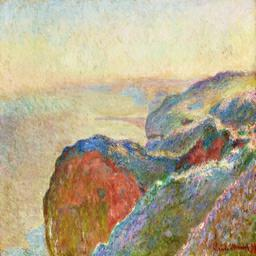

In [4]:
Image(r'C:\Users\henri\dsci478k\data\monets\000c1e3bff.jpg')

Before we start training we needed to define a few parameters in order to load the dataset into the memory, we use an image size of 64x64 

In [ ]:
batch_size = 70
image_size = (64,64)
workers=3

#### Results

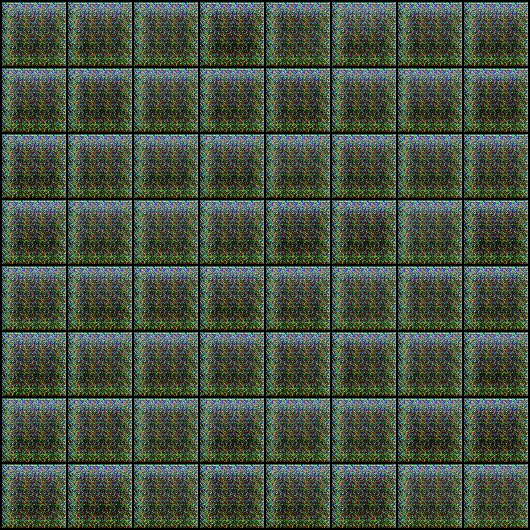

In [4]:
Image('./generated/generated-images-0013.png')

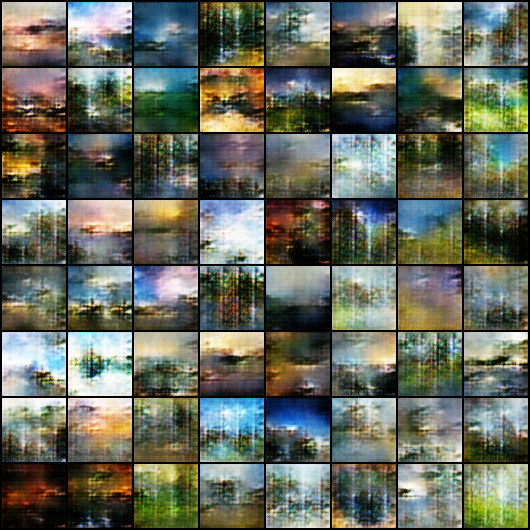

In [5]:
Image('./generated/generated-images-0100.png')

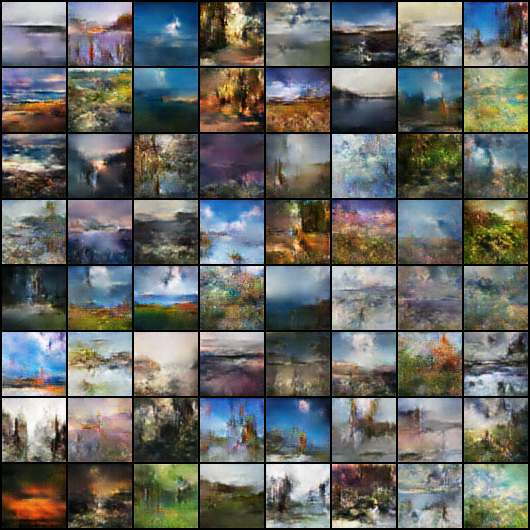

In [7]:
Image('./generated/generated-images-0300.png')

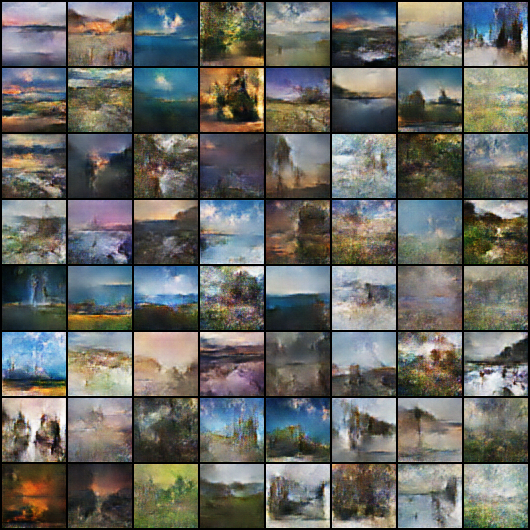

In [8]:
Image('./generated/generated-images-0500.png')

#### Conclusion

#### Sources

1: GANs Trained by a Two Time-Scale Update Rule Converge to a Local Nash Equilibrium
- by : Martin Heusel, Hubert Ramsauer, Thomas Unterthiner, Bernhard Nessler, Sepp Hochreiter

